In [1]:
#Exercise 1

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (classifications)

#Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

#Train the model using the training data
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")

Accuracy of the Logistic Regression model: 100.00%


In [3]:
#Exercise 2

In [4]:
#Import necessary functions
from sklearn.metrics import confusion_matrix, classification_report

#Use the trained model to make predictions (done already)
# y_pred = model.predict(X_test)  # Already done in Exercise 1

#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Generate classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
#2. Clustering Techniques
#Exercise 3: Implementing K-Means Clustering


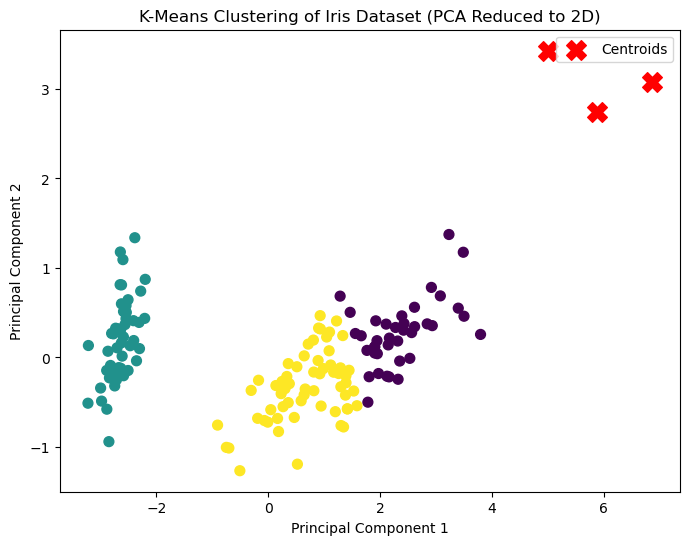

In [6]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Load the Iris dataset (or another dataset of your choice)
iris = load_iris()
X = iris.data  # Features (we'll use only the first two for visualization)
y = iris.target  # True labels (not used for clustering, just for comparison)

#Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We know Iris has 3 types of flowers
kmeans.fit(X)  # Fit the KMeans model on the data
y_kmeans = kmeans.predict(X)  # Predict cluster labels

#Use PCA for dimensionality reduction to visualize clusters in 2D
pca = PCA(2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)  # Transform the data

#Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)  # Clustered points
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')  # Cluster centers
plt.title('K-Means Clustering of Iris Dataset (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

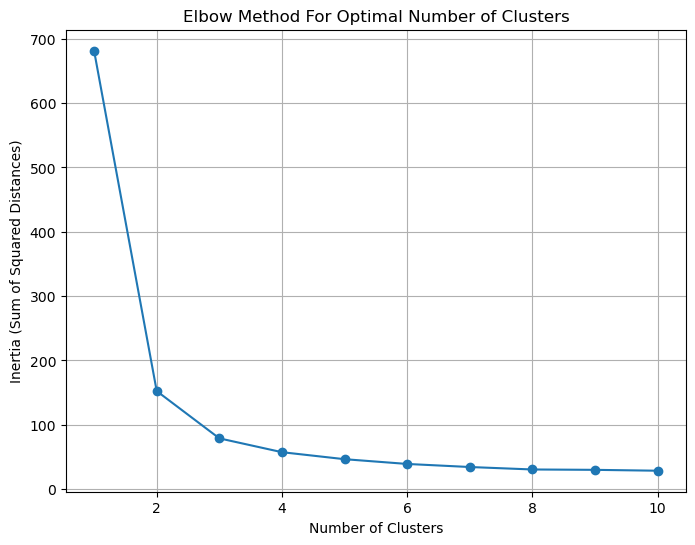

In [7]:
#Exercise 4
#Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

#Load the Iris dataset
iris = load_iris()
X = iris.data  # Use the feature data

#Calculate inertia for different numbers of clusters (Elbow Method)
inertia = []  # List to store inertia values
cluster_range = range(1, 11)  # We will test from 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Store the inertia for each number of clusters

#Plot inertia vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


In [8]:
#3. Introduction to Advanced Clustering Techniques
#Exercise 5: Implementing Hierarchical Clustering


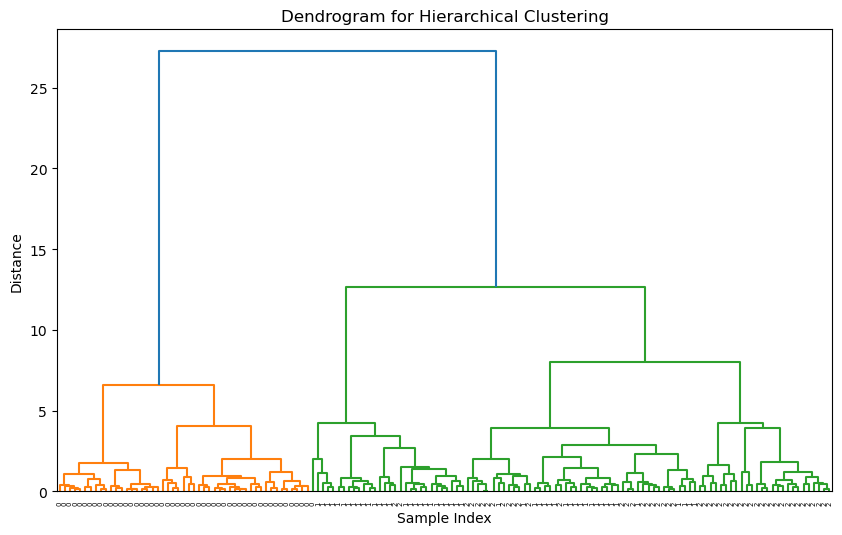

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 2: Perform Hierarchical Clustering
# Perform hierarchical clustering using the "ward" method
Z = linkage(X_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

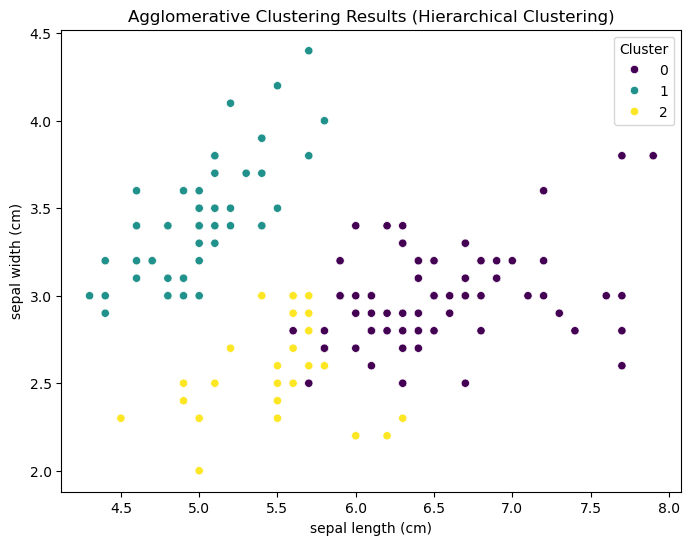

In [10]:
# Step 3: Apply Agglomerative Clustering
# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Visualize the clusters using a scatter plot
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = agg_clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering Results (Hierarchical Clustering)')
plt.show()

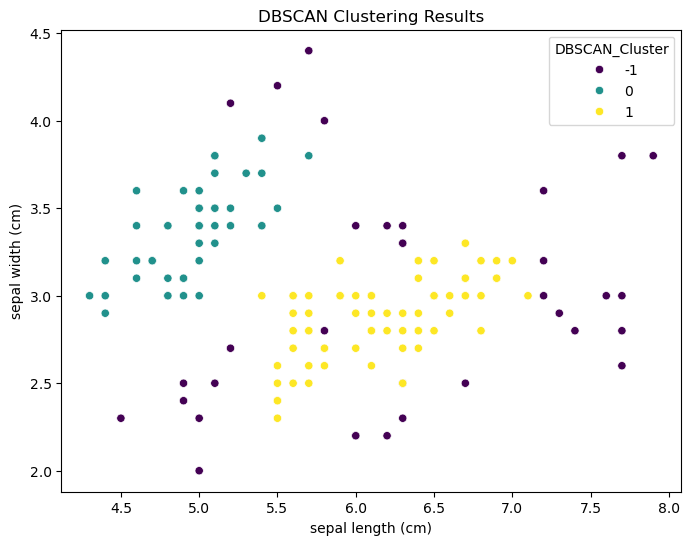

Silhouette Score: 0.36


In [11]:
# Exercise 6: Introduction to DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Standardize the data (already done in Exercise 5)
# X_scaled is the standardized dataset from previous steps
# Apply DBSCAN with some initial parameters

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['DBSCAN_Cluster'] = db_clusters

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# Print the silhouette score for evaluating the clustering quality
silhouette_avg = silhouette_score(X_scaled, db_clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

In [12]:
# Experiment with different values of eps and min_samples
for eps_value in [0.3, 0.5, 0.7]:
    for min_samples_value in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        db_clusters = dbscan.fit_predict(X_scaled)
        
        # Calculate silhouette score
        if len(set(db_clusters)) > 1:  # Silhouette score only works if more than 1 cluster is formed
            silhouette_avg = silhouette_score(X_scaled, db_clusters)
            print(f"DBSCAN with eps={eps_value}, min_samples={min_samples_value}, Silhouette Score: {silhouette_avg:.2f}")
        else:
            print(f"DBSCAN with eps={eps_value}, min_samples={min_samples_value}, resulted in 1 cluster.")
            

DBSCAN with eps=0.3, min_samples=3, Silhouette Score: -0.15
DBSCAN with eps=0.3, min_samples=5, Silhouette Score: -0.19
DBSCAN with eps=0.3, min_samples=10, resulted in 1 cluster.
DBSCAN with eps=0.5, min_samples=3, Silhouette Score: 0.16
DBSCAN with eps=0.5, min_samples=5, Silhouette Score: 0.36
DBSCAN with eps=0.5, min_samples=10, Silhouette Score: 0.01
DBSCAN with eps=0.7, min_samples=3, Silhouette Score: 0.51
DBSCAN with eps=0.7, min_samples=5, Silhouette Score: 0.52
DBSCAN with eps=0.7, min_samples=10, Silhouette Score: 0.42
